In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import sys

In [2]:
# Gray Scale
gray = cv2.imread("../assets/seg.png", 0)

In [3]:
# Otsu's Binarization
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [39]:
# Labeling
n, label = cv2.connectedComponents(binary, connectivity=8)

In [40]:
# Preparing labeling result
color_src = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
h, w = binary.shape[:2]
colors = []

for i in range(1, n+1):
    colors.append(np.array([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]))

In [41]:
# Displaying labeling result
# Paint each object
for y in range(0, h):
    for x in  range(0,w):
        if label[y, x] > 0:
            color_src[y, x] = colors[label[y, x]]
        else:
            color_src[y, x] = [0, 0, 0]

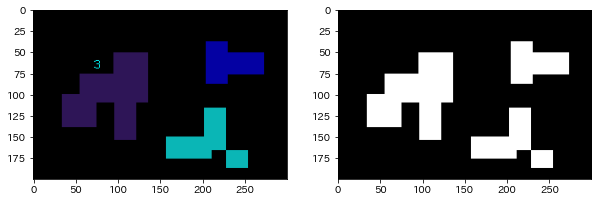

In [42]:
# A number of objects 
cv2.putText(color_src, str(n - 1), (70, 70), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 255))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(color_src)
plt.subplot(122)
plt.imshow(binary, cmap="gray")

In [47]:
# Labeling (detail)
label2 = cv2.connectedComponentsWithStats(binary, connectivity = 8)

In [48]:
# Object information extraction
m = label2[0] - 1
data = np.delete(label2[2], 0, 0)
center = np.delete(label2[3], 0, 0)

In [49]:
# Binarization > BGR
color_src1 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

In [50]:
# Display labeling result
for i in range(m):
    # Display rectangle of each object
    x0 = data[i][0]
    y0 = data[i][1]
    x1 = data[i][0] + data[i][2]
    y1 = data[i][1] + data[i][3]
    cv2.rectangle(color_src1, (x0, y0), (x1, y1), (0, 0, 255))

    # Labeling number and area 
    cv2.putText(color_src1, "ID: " +str(i + 1), (x0, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 0.5, (0, 255, 255))
    cv2.putText(color_src1, "S: " +str(data[i][4]), (x0, y1 + 30), cv2.FONT_HERSHEY_PLAIN, 0.5, (0, 255, 255))

    # Center of gravity 
    cv2.putText(color_src1, "X: " + str(int(center[i][0])), (x1 - 10, y1 + 15), cv2.FONT_HERSHEY_PLAIN, 0.5, (0, 255, 255))
    cv2.putText(color_src1, "Y: " + str(int(center[i][1])), (x1 - 10, y1 + 30), cv2.FONT_HERSHEY_PLAIN, 0.5, (0, 255, 255))

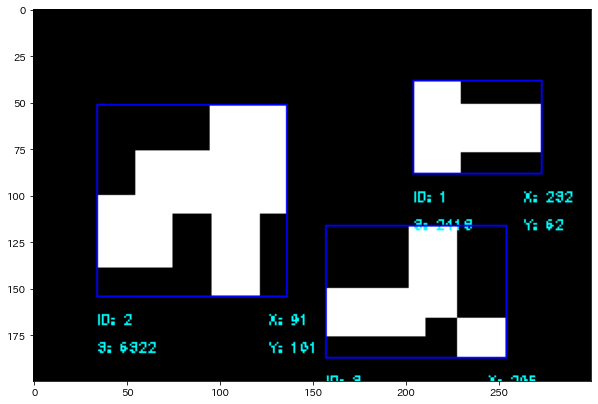

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(color_src1)